In [4]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [1]:
TRAINING_DIR = "/kaggle/input/new-gen-auf/train/training/"
VALIDATION_DIR = "/kaggle/input/new-gen-auf/train/validation/"

Using img generator

In [2]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
    train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1/256.0,
                                                                    rotation_range=40,
                                                                    width_shift_range=0.2,
                                                                    height_shift_range=0.2,
                                                                    shear_range=0.2,
                                                                    zoom_range=0.2,
                                                                    horizontal_flip=True,
                                                                    fill_mode='nearest')

    train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=100,
                                                      class_mode='binary',
                                                      target_size=(150, 150))

    validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1/256.0)

    validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=25,
                                                                class_mode='binary',
                                                                target_size=(150, 150))
    return train_generator, validation_generator

In [5]:
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 22501 images belonging to 2 classes.
Found 2499 images belonging to 2 classes.


In [21]:
def create_model():
    model = tf.keras.models.Sequential([ 
      tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(256, (3, 3), activation = 'relu'),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(256, (3, 3), activation = 'relu'),
      tf.keras.layers.MaxPooling2D(2, 2),  

      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation = 'relu'),
      tf.keras.layers.Dense(1, activation ='sigmoid')]) 
    model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate = 0.001),
                loss='binary_crossentropy',
                metrics=['accuracy']) 
    return model

In [17]:
DOGS_DIR = os.path.join(TRAINING_DIR, "dogs")
CATS_DIR = os.path.join(TRAINING_DIR, "cats")
print(len(os.listdir(DOGS_DIR)))
print(len(os.listdir(CATS_DIR)))

11250
11251


In [22]:
# Get the untrained model
model = create_model()

# Train the model
# Note that this may take some time.
history = model.fit(train_generator,
                    epochs=15,
                    steps_per_epoch = 225, #45000 = 450*100
                    verbose=1,
                    validation_data=validation_generator,
                    validation_steps = 10)


Epoch 1/15
225/225 [==============================] - 1739s 8s/step - loss: 0.6967 - accuracy: 0.5424 - val_loss: 0.6781 - val_accuracy: 0.5520
Epoch 2/15
225/225 [==============================] - 1717s 8s/step - loss: 0.6579 - accuracy: 0.6089 - val_loss: 0.6673 - val_accuracy: 0.6480
Epoch 3/15
225/225 [==============================] - 1715s 8s/step - loss: 0.6155 - accuracy: 0.6613 - val_loss: 0.5455 - val_accuracy: 0.7400
Epoch 4/15
225/225 [==============================] - 1726s 8s/step - loss: 0.5874 - accuracy: 0.6894 - val_loss: 0.5344 - val_accuracy: 0.7600
Epoch 5/15
225/225 [==============================] - 1708s 8s/step - loss: 0.5653 - accuracy: 0.7056 - val_loss: 0.4508 - val_accuracy: 0.7800
Epoch 6/15
225/225 [==============================] - 1714s 8s/step - loss: 0.5419 - accuracy: 0.7258 - val_loss: 0.4912 - val_accuracy: 0.7560
Epoch 7/15
225/225 [==============================] - 1712s 8s/step - loss: 0.5238 - accuracy: 0.7441 - val_loss: 0.4698 - val_accuracy:

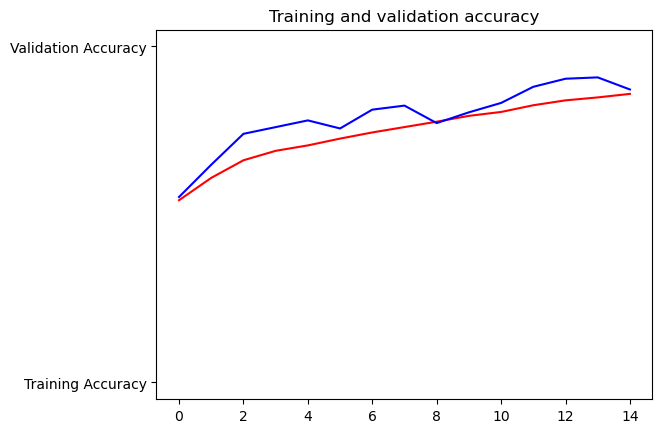

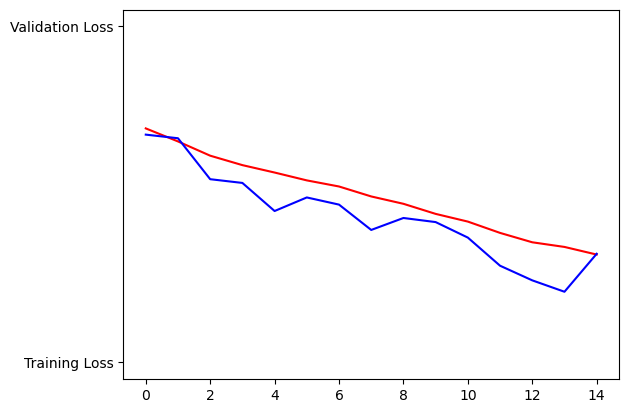

In [24]:
model.save("my_model.h5")
model.save_weights("my_weights.h5")
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()



In [8]:
new_callbacks = tf.keras.callbacks.ModelCheckpoint(filepath = "/kaggle/working/checkpoints",
                                                  save_weights_only = True,
                                                  verbose = 1)

In [9]:
new_model = tf.keras.models.load_model("/kaggle/input/bad-thule/my_model.h5")
history = new_model.fit(train_generator,
                    epochs=10,
                    steps_per_epoch = 225, #45000 = 450*100
                    verbose=1,
                    validation_data=validation_generator,
                    validation_steps = 10,
                    callbacks = [new_callbacks])

Epoch 1/10
225/225 [==============================] - ETA: 0s - loss: 0.3069 - accuracy: 0.8632
Epoch 1: saving model to /kaggle/working/checkpoints
225/225 [==============================] - 1723s 8s/step - loss: 0.3069 - accuracy: 0.8632 - val_loss: 0.2380 - val_accuracy: 0.9000
Epoch 2/10
225/225 [==============================] - ETA: 0s - loss: 0.2929 - accuracy: 0.8695
Epoch 2: saving model to /kaggle/working/checkpoints
225/225 [==============================] - 1717s 8s/step - loss: 0.2929 - accuracy: 0.8695 - val_loss: 0.1815 - val_accuracy: 0.9200
Epoch 3/10
225/225 [==============================] - ETA: 0s - loss: 0.2807 - accuracy: 0.8787
Epoch 3: saving model to /kaggle/working/checkpoints
225/225 [==============================] - 1715s 8s/step - loss: 0.2807 - accuracy: 0.8787 - val_loss: 0.1651 - val_accuracy: 0.9440
Epoch 4/10
225/225 [==============================] - ETA: 0s - loss: 0.2699 - accuracy: 0.8850
Epoch 4: saving model to /kaggle/working/checkpoints
225/2

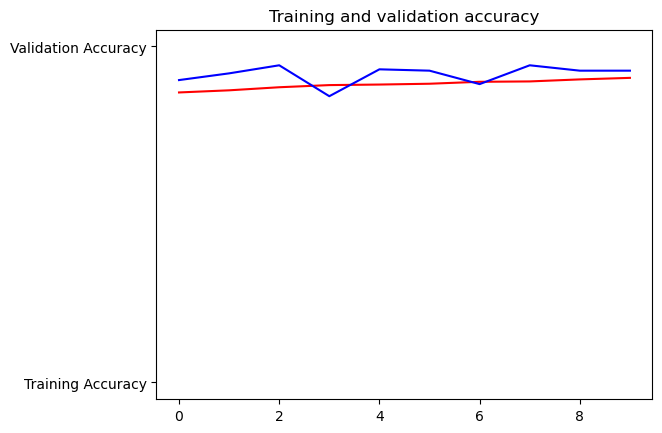

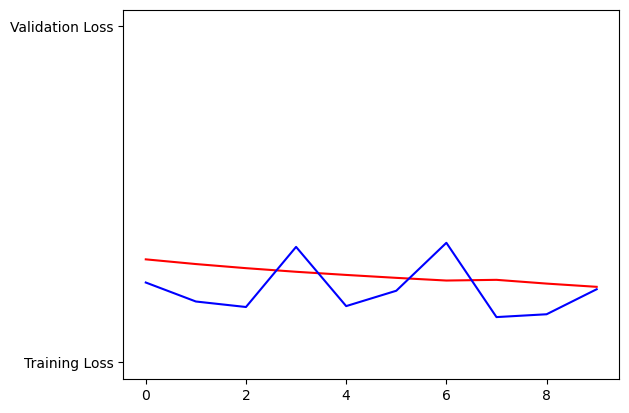

In [12]:
new_model.save("cat_dog_model.h5")
new_model.save_weights("cat_dog_weights.h5")
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()
